# **Load Packages**

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy  as np
import pandas as pd

import seaborn as sns
sns.set(style = 'darkgrid')

import matplotlib.pyplot as plt

from sklearn.preprocessing   import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics  import f1_score, confusion_matrix, classification_report

# **Load Dataset**

In [3]:
# Load Home Loan dataset
home_loan = pd.read_csv('Home Loan.csv', sep = ';')

In [4]:
print('Home Loan dataset:')
home_loan.head(5)

Home Loan dataset:


,Loan ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Good Credit History,Urban,Accepted
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Good Credit History,Rural,Not Accepted
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Good Credit History,Urban,Accepted
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Good Credit History,Urban,Accepted
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Good Credit History,Urban,Accepted


In [5]:
print('Information about Home Loan dataset:')
print(home_loan.info())

Information about Home Loan dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self Employed       582 non-null    object 
 6   Applicant Income    614 non-null    int64  
 7   Coapplicant Income  614 non-null    float64
 8   Loan Amount         592 non-null    float64
 9   Loan Amount Term    600 non-null    float64
 10  Credit History      564 non-null    object 
 11  Property Area       614 non-null    object 
 12  Loan Status         614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB
None


# **Data Preparation and Exploration**

In [6]:
# Copy Home Loan dataset
home_loan_prep = home_loan.copy()

In [7]:
# Show the distribution of values in the Loan Status feature
print('Distribution of values:')

print(pd.concat([home_loan_prep['Loan Status'].value_counts().rename('Count'),
                 100 * home_loan_prep['Loan Status'].value_counts(normalize = True).rename('Percentage Loan Status')],
                 axis = 1))

Distribution of values:
              Count  Percentage Loan Status
Loan Status                                
Accepted        422               68.729642
Not Accepted    192               31.270358


<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
The distribution of Accepted and Not Accepted labels is known to be unbalanced, with an occurrence ratio of 68.72% for Accepted labels and 31.27% for Not Accepted labels.
</p>

In [8]:
home_loan_prep['Loan Status'] = home_loan_prep['Loan Status'].replace(to_replace = {'Accepted': 1, 'Not Accepted': 0})

In [9]:
# Calculating the correlation between numerical features
column_names = ['Applicant Income', 'Coapplicant Income', 'Loan Amount', 'Loan Amount Term', 'Loan Status']

home_loan_corr = home_loan_prep[column_names].corr().abs()

print('Show correlation between features:')
print(home_loan_corr.to_string())

Show correlation between features:
                    Applicant Income  Coapplicant Income  Loan Amount  Loan Amount Term  Loan Status
Applicant Income            1.000000            0.116605     0.570909          0.045306     0.004710
Coapplicant Income          0.116605            1.000000     0.188619          0.059878     0.059187
Loan Amount                 0.570909            0.188619     1.000000          0.039447     0.037318
Loan Amount Term            0.045306            0.059878     0.039447          1.000000     0.021268
Loan Status                 0.004710            0.059187     0.037318          0.021268     1.000000


<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Based on the results of the analysis, it can be seen that <b>Applicant Income</b> has a moderate correlation with <b>Loan Amount</b>, indicating that the higher the income of the applicant, the more likely the loan amount applied for. Meanwhile, the other features show low correlation values.
</p>

In [10]:
# Create a function to show the number of missing values
def display_missing(dataframe):
    for column in dataframe.columns.tolist():
        print(f'Number of missing values in the {column} column is {dataframe[column].isnull().sum()}')

# Show the number of missing values in each feature
print('Number of missing values before imputation:')
display_missing(home_loan_prep)

Number of missing values before imputation:
Number of missing values in the Loan ID column is 0
Number of missing values in the Gender column is 13
Number of missing values in the Married column is 3
Number of missing values in the Dependents column is 15
Number of missing values in the Education column is 0
Number of missing values in the Self Employed column is 32
Number of missing values in the Applicant Income column is 0
Number of missing values in the Coapplicant Income column is 0
Number of missing values in the Loan Amount column is 22
Number of missing values in the Loan Amount Term column is 14
Number of missing values in the Credit History column is 50
Number of missing values in the Property Area column is 0
Number of missing values in the Loan Status column is 0


In [11]:
# Handle missing values in features with categorical data types
feature_names = ['Gender', 'Married', 'Dependents', 'Self Employed', 'Credit History', 'Loan Amount Term']

for feature in feature_names:
    home_loan_prep[feature] = home_loan_prep[feature].fillna(home_loan_prep[feature].mode()[0])

In [12]:
# Handle missing values in features with numeric data type
home_loan_prep['Loan Amount'] = home_loan_prep['Loan Amount'].fillna(home_loan_prep['Loan Amount'].median())

In [13]:
print('Number of missing values after imputation:')
display_missing(home_loan_prep)

Number of missing values after imputation:
Number of missing values in the Loan ID column is 0
Number of missing values in the Gender column is 0
Number of missing values in the Married column is 0
Number of missing values in the Dependents column is 0
Number of missing values in the Education column is 0
Number of missing values in the Self Employed column is 0
Number of missing values in the Applicant Income column is 0
Number of missing values in the Coapplicant Income column is 0
Number of missing values in the Loan Amount column is 0
Number of missing values in the Loan Amount Term column is 0
Number of missing values in the Credit History column is 0
Number of missing values in the Property Area column is 0
Number of missing values in the Loan Status column is 0


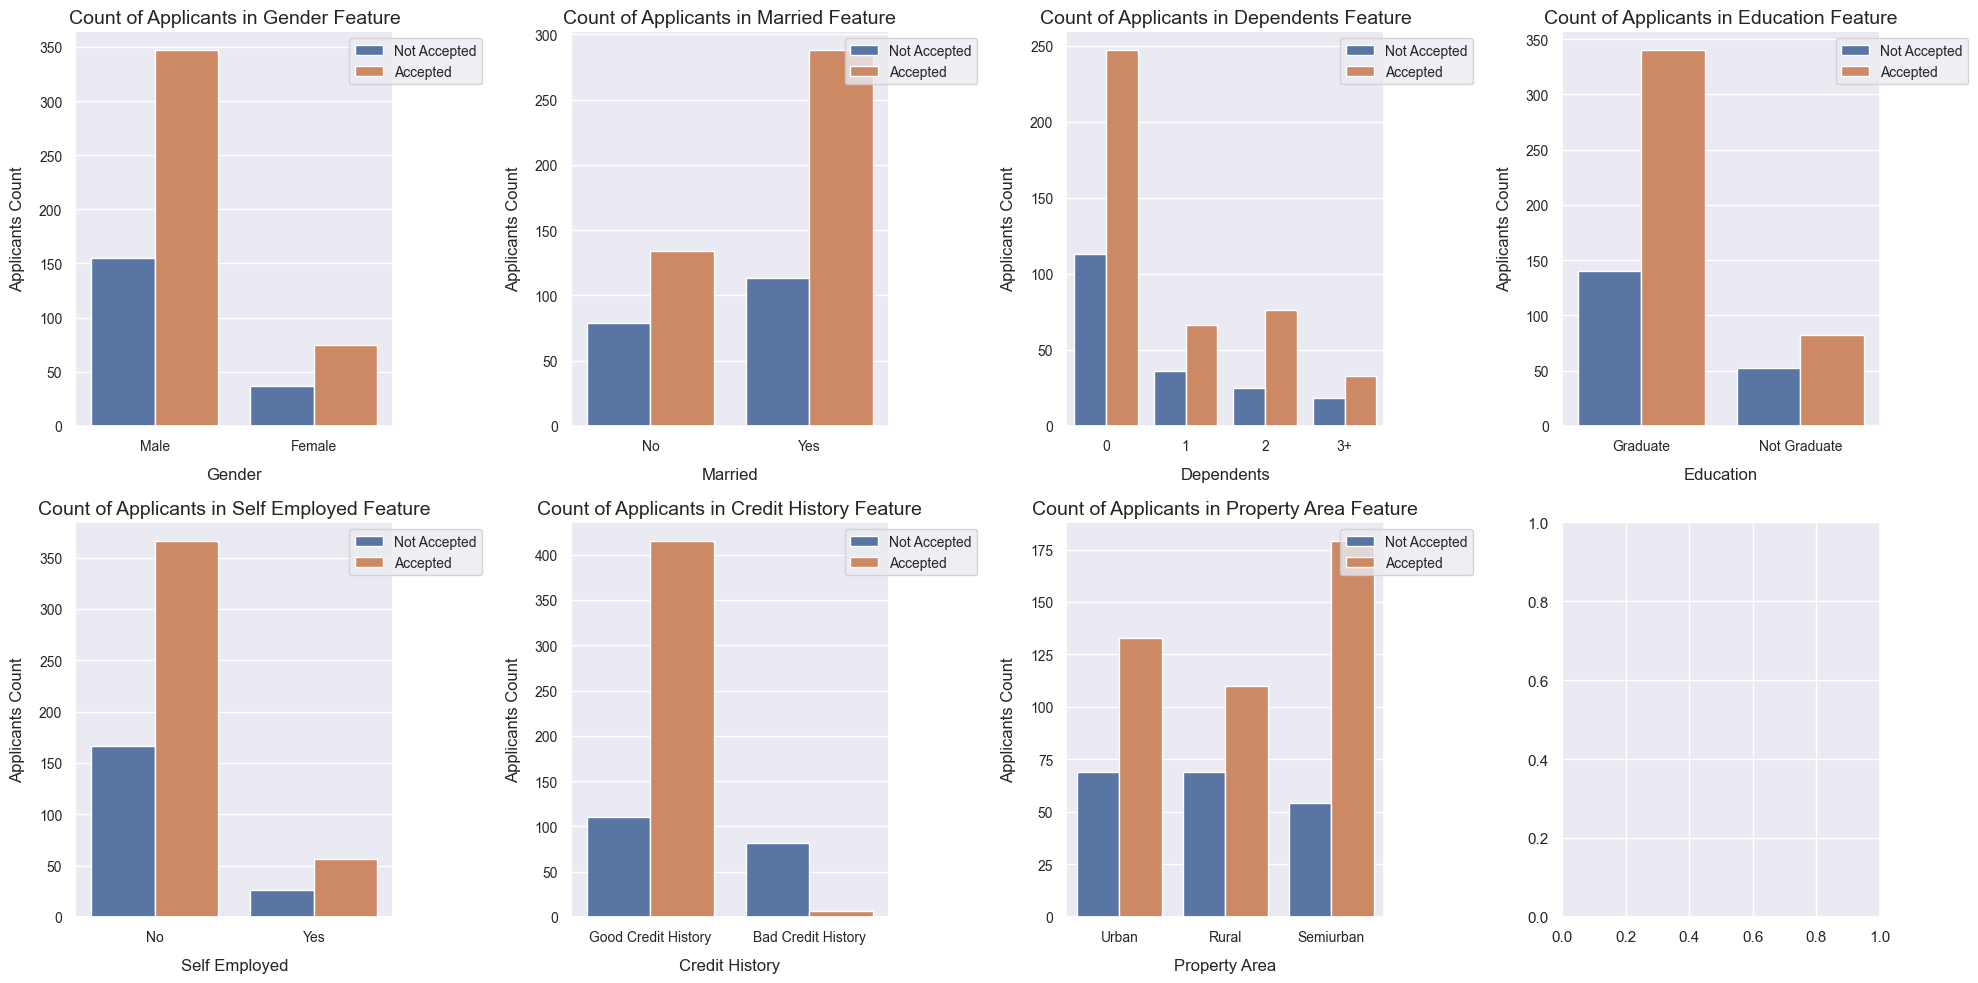

In [14]:
# Data exploration of category features
feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self Employed', 'Credit History', 'Property Area']

fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))

for i, (ax, feature) in enumerate(zip(axs.flatten(), feature_names)):
    sns.countplot(x = feature, hue = 'Loan Status', data = home_loan_prep, ax = ax)

    ax.set_xlabel(f'{feature}'       , fontsize = 12, labelpad = 10)
    ax.set_ylabel('Applicants Count' , fontsize = 12, labelpad = 10)

    ax.tick_params(axis = 'x', labelsize = 10)
    ax.tick_params(axis = 'y', labelsize = 10)

    ax.legend(['Not Accepted', 'Accepted'], loc = 'upper right', bbox_to_anchor = (1.3, 1), fontsize = 10)

    ax.set_title(f'Count of Applicants in {feature} Feature', fontsize = 14)

plt.tight_layout()
plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Based on the visualization, there are seven main features analyzed for loan status, namely Gender</b>, Married</b>, <b>Dependents</b>, <b>Education</b>, <b>Self Employed</b>, <b>Credit History</b>, and <b>Property Area</b>, where Accepted status is more dominant in most features than Not Accepted. In the <b>Gender</b> feature, men are approved more often than women, while in the <b>Married</b> feature, married applicants are approved more often than unmarried ones. For the <b>Dependents</b> feature, applicants with no dependents dominate the Accepted category, while more dependents tend to reduce the chances of approval. College graduates (Graduate) on the <b>Education</b> feature are more likely to get loan approval than non-graduates, and on the <b>Self Employed feature</b>, applicants who work as employees are more likely to be approved than those who are self-employed.
</p>

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
The most significant feature is <b>Credit History</b>, where a good credit history strongly influences loan approval.Meanwhile, in <b>Property Area</b>, applicants from semi-urban areas have the highest approval rate, followed by urban and rural areas.
</p>

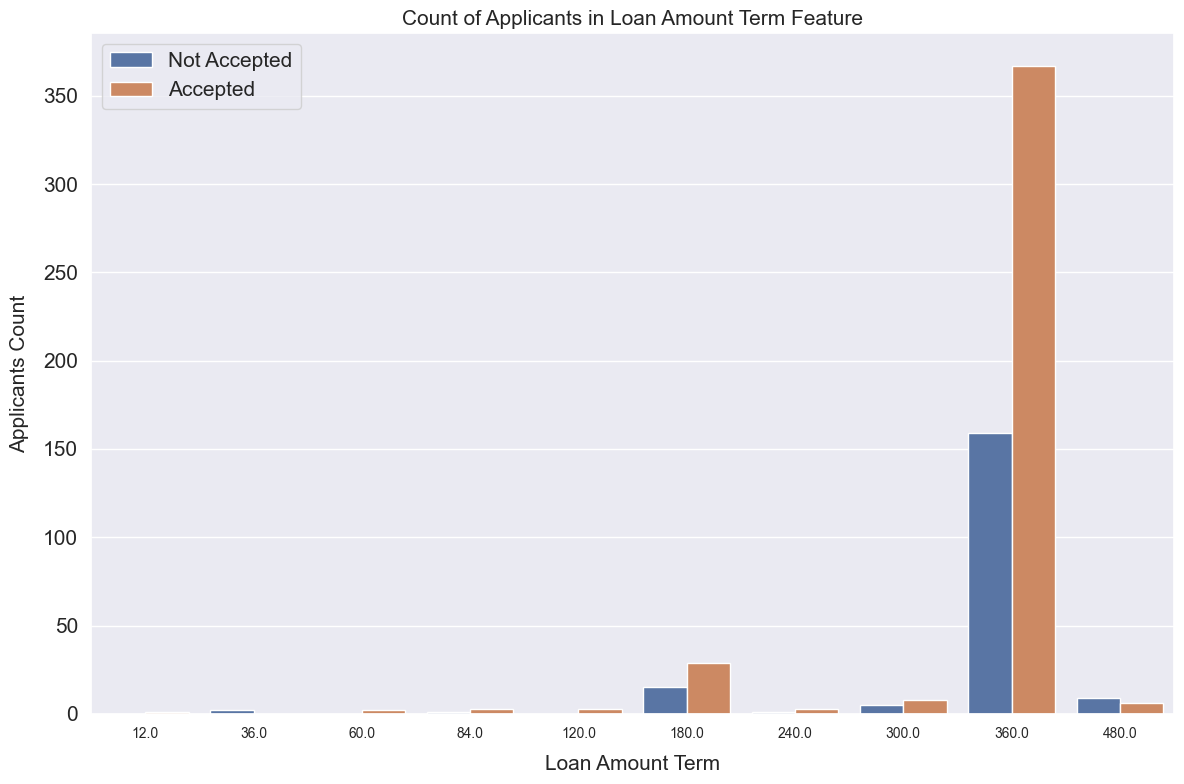

In [15]:
# Data exploration of Loan Amount Term feature
plt.figure(figsize = (12, 8))

sns.countplot(x = 'Loan Amount Term', hue = 'Loan Status', data = home_loan_prep)

plt.xlabel('Loan Amount Term', size = 15, labelpad = 10)
plt.ylabel('Applicants Count'    , size = 15, labelpad = 10)

plt.tick_params(axis = 'x', labelsize = 10)
plt.tick_params(axis = 'y', labelsize = 15)

plt.legend(['Not Accepted', 'Accepted'], loc = 'upper left', prop = {'size': 15})

plt.title('Count of Applicants in Loan Amount Term Feature', size = 15)

plt.tight_layout()
plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Based on the visualization of the <b>Loan Amount Term</b> feature, loan applicants with a loan term of 360 days tend to be accepted more than not, followed by 180 days in second place. Meanwhile, the other terms have a very small number of applicants.
</p>

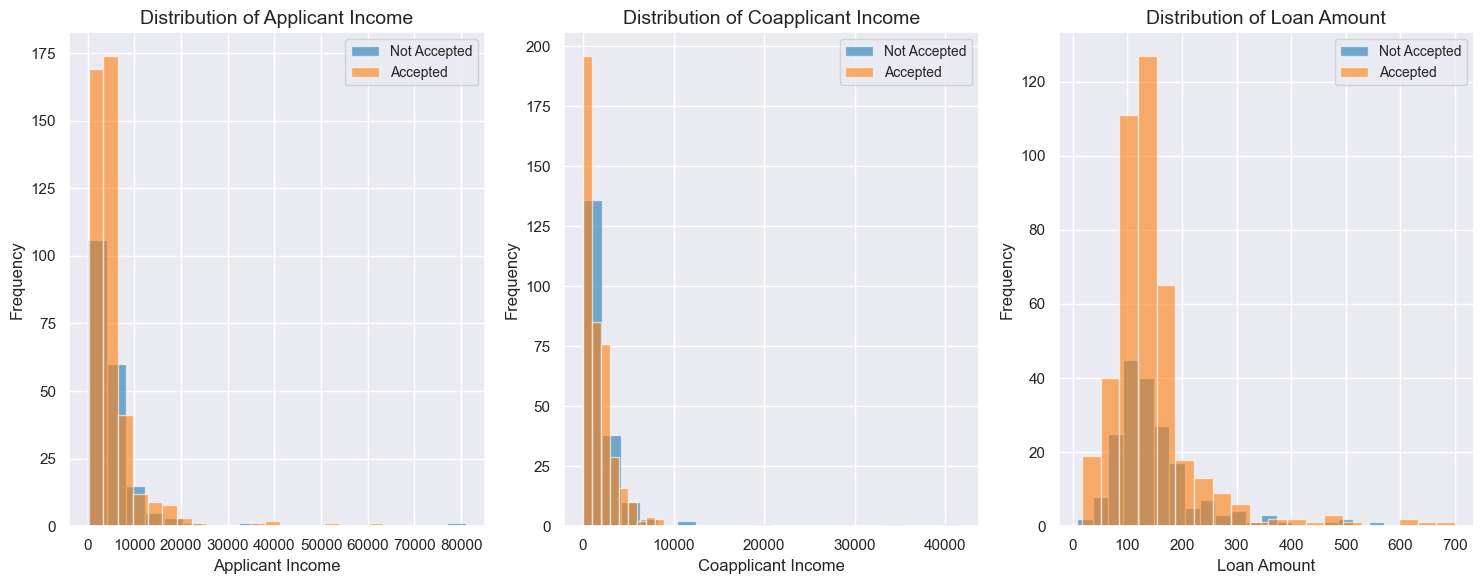

In [16]:
# Data exploration of numeric features
feature_names = ['Applicant Income', 'Coapplicant Income', 'Loan Amount']

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 6), constrained_layout = True)

for ax, feature in zip(axs, feature_names):
    home_loan_prep[home_loan_prep['Loan Status'] == 0][feature].hist(bins = 20, color = '#1f77b4', alpha = 0.6, ax =ax, 
                                                                      label = 'Not Accepted')
    
    home_loan_prep[home_loan_prep['Loan Status'] == 1][feature].hist(bins = 20, color = '#ff7f0e', alpha = 0.6, ax =ax, 
                                                                            label = 'Accepted')
    
    ax.set_xlabel(feature    , fontsize = 12)
    ax.set_ylabel('Frequency', fontsize = 12)

    ax.legend(fontsize = 10)

    ax.set_title(f'Distribution of {feature}', fontsize = 14)

plt.tight_layout()
plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Based on the visualization of the distribution of the <b>Applicant Income</b>, <b>Coapplicant Income</b>, and <b>Loan Amount features</b>, it can be seen that the majority of the data is concentrated in a relatively low value range. In the first feature, the <b>Applicant Income</b> distribution shows that the majority of loan applications come from the applicants with low income (below 10000). In this range, the number of accepted applications is higher than those that are not accepted. The second feature, which shows <b>Coapplicant Income</b>, also indicates a similar pattern, where the majority of applications come from applicants with low <b>Coapplicant Income</b> (below 5000), and accepted applications dominate. Meanwhile, the third feature, which shows the <b>Loan Amount</b> distribution, shows that most accepted applications are in the range of 100-200 thousand.
</p>



In [17]:
# Perform feature engineering by adding a new feature called Loan Amount Term Binned
def loan_amount_term_transformation(term):
    if term < 120:
        return 'Short-term Loans'
    
    if term >= 120 and term < 300:
        return 'Medium-term Loans'
    
    if term >= 360:
        return 'Long-term Loans'
    
home_loan_prep['Loan Amount Term Binned'] = home_loan_prep['Loan Amount Term'].map(loan_amount_term_transformation)

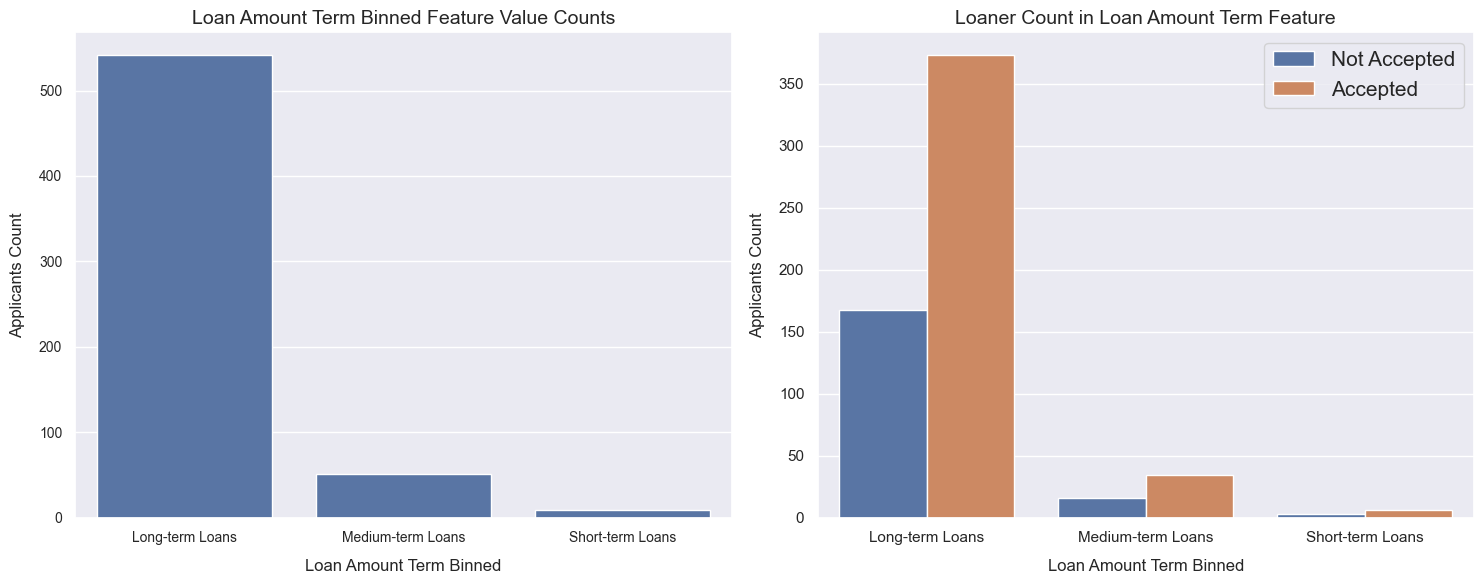

In [18]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))

# Show barplot visualization for Loan Amount Term Binned feature
sns.barplot(x = home_loan_prep['Loan Amount Term Binned'].value_counts().index, y = home_loan_prep['Loan Amount Term Binned'].value_counts().values,
            ax = axs[0])

axs[0].set_xlabel('Loan Amount Term Binned', fontsize = 12, labelpad = 10)
axs[0].set_ylabel('Applicants Count'       , fontsize = 12, labelpad = 10)

axs[0].tick_params(axis = 'x', labelsize = 10)
axs[0].tick_params(axis = 'y', labelsize = 10)

axs[0].set_title('Loan Amount Term Binned Feature Value Counts', fontsize = 14)

# Show countplot visualization for Loan Amount Term Binned feature
sns.countplot(x = 'Loan Amount Term Binned', hue = 'Loan Status', data = home_loan_prep, ax = axs[1])

axs[1].set_xlabel('Loan Amount Term Binned', size = 12, labelpad = 10)
axs[1].set_ylabel('Applicants Count'           , size = 12, labelpad = 10)

axs[0].tick_params(axis = 'x', labelsize = 10)
axs[0].tick_params(axis = 'y', labelsize = 10)

axs[1].legend(['Not Accepted', 'Accepted'], loc = 'upper right', prop = {'size': 15})

axs[1].set_title('Loaner Count in Loan Amount Term Feature', fontsize = 14)

plt.tight_layout()
plt.show()

In [19]:
print('Updated Home Loan dataset:')
home_loan_prep.head(5)

Updated Home Loan dataset:


,Loan ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status,Loan Amount Term Binned
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,Good Credit History,Urban,1,Long-term Loans
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Good Credit History,Rural,0,Long-term Loans
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Good Credit History,Urban,1,Long-term Loans
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Good Credit History,Urban,1,Long-term Loans
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Good Credit History,Urban,1,Long-term Loans


In [20]:
y = home_loan_prep.pop('Loan Status').to_numpy()

In [21]:
# Delete unnecessary features
home_loan_prep = home_loan_prep.drop(['Loan ID', 'Loan Amount Term'], axis = 1)

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
Binary features, such as <b>Gender</b>, <b>Married</b>, <b>Education</b>, <b>Self Employed</b>, and <b>Credit History</b>, will be converted into a format that can be understood by the model. For these features, the LabelEncoder technique will be applied. Meanwhile, features with more than two categories, such as <b>Dependents</b>, <b>Property Area</b>, and <b>Loan Amount Term Binned</b>, will be processed using the one-hot encoding technique.
</p>

In [22]:
feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self Employed', 'Credit History', 'Property Area', 
                 'Loan Amount Term Binned']

feature_categorical_non_binary = []

labelers = {}

# Perform data transformation using label encoding
for feature in feature_names:
    if len(home_loan_prep[feature].unique()) == 2:
        labelers[feature] = LabelEncoder()

        home_loan_prep[feature] = labelers[feature].fit_transform(home_loan_prep[feature])
    else:
        feature_categorical_non_binary.append(feature)

# Perform data transformation using one-hot encoding
home_loan_prep = pd.get_dummies(home_loan_prep, columns = feature_categorical_non_binary, dtype = 'int')

In [23]:
print('The latest Home Loan dataset:')
home_loan_prep.head(5)

The latest Home Loan dataset:


,Gender,Married,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Credit History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property Area_Rural,Property Area_Semiurban,Property Area_Urban,Loan Amount Term Binned_Long-term Loans,Loan Amount Term Binned_Medium-term Loans,Loan Amount Term Binned_Short-term Loans
0,1,0,0,0,5849,0.0,128.0,1,1,0,0,0,0,0,1,1,0,0
1,1,1,0,0,4583,1508.0,128.0,1,0,1,0,0,1,0,0,1,0,0
2,1,1,0,1,3000,0.0,66.0,1,1,0,0,0,0,0,1,1,0,0
3,1,1,1,0,2583,2358.0,120.0,1,1,0,0,0,0,0,1,1,0,0
4,1,0,0,0,6000,0.0,141.0,1,1,0,0,0,0,0,1,1,0,0


In [24]:
X = home_loan_prep.to_numpy()

# **Data Modeling**

In [25]:
# Separate training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
In this analysis, the model used is the <b>Random Forest Classifier</b>, with evaluation using the <b>StratifiedKFold cross-validation</b> technique.This technique divides the data into multiple folds while maintaining a balanced proportion of class distribution, which is important for unbalanced datasets.The metric used to measure the performance of the model is <b>F1-Score</b>, as it is effective for assessing performance on unbalanced data, where one of the classes is much more dominant.
</p>

In [26]:
# Setting up cross-validation technique
skf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 42)

# Build a model
clf_random_forest = RandomForestClassifier(criterion = 'entropy', random_state = 42)

clf_random_forest.fit(X_train, y_train)

# Show the cross-validation score
validation_scores = cross_val_score(clf_random_forest, X_train, y_train, scoring = 'f1', cv = skf)

print(f'F1-Score Mean                    = {100 * validation_scores.mean():.2f}%')
print(f'F1-Score Standar Deviation Score = {validation_scores.std():.4f}')

F1-Score Mean                    = 87.17%
F1-Score Standar Deviation Score = 0.0391



------------------------- F1-Score -------------------------

F1-Score of the testing data = 85.25%

------------------ Classification Report -------------------

              precision    recall  f1-score   support

Not Accepted       0.90      0.42      0.57        43
    Accepted       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123


--------------------- Confusion Matrix ---------------------



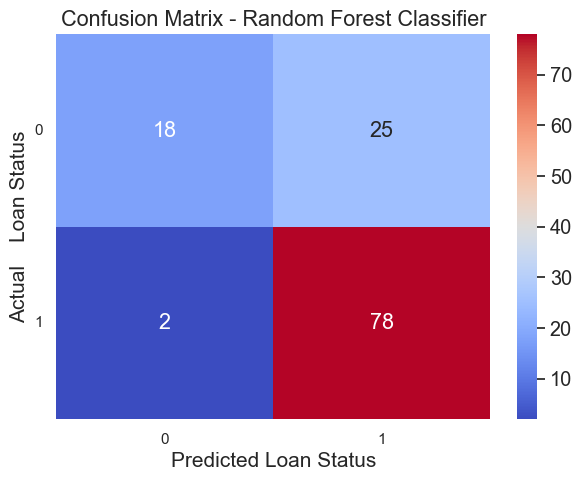

In [27]:
y_pred = clf_random_forest.predict(X_test)

# Show the F1-score
print('\n' + '\033[1m' + ' F1-Score '.center(60,'-') + '\033[0m' + '\n')

score_performance = f1_score(y_test, y_pred)
print(f'F1-Score of the testing data = {100 * score_performance:.2f}%')

# Show the classification report
target_names = ['Not Accepted', 'Accepted']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, y_pred, target_names = target_names))

# Show the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
labels = list(np.unique(y_test))
labels.sort()

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(figsize = (7, 5))
sns.set(font_scale = 1.3)

sns.heatmap(conf_matrix, annot = True, fmt = 'd', ax = ax, cmap = 'coolwarm')

ax.set_title('Confusion Matrix - Random Forest Classifier')

ax.set_xlabel('Predicted Loan Status', fontsize = 15)
ax.set_ylabel('Actual    Loan Status', fontsize = 15)

ax.set_xticklabels(list(labels))
ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
F1-score value <b>85.25%</b> was obtained, which shows that the model performs quite well in handling classification problems. However, to further improve the performance of the model, Hyperparameter Tuning will be performed. This step aims to find the best parameter combination that can maximize the model evaluation results.
</p>

In [28]:
# Number of trees
n_estimators = list(np.linspace(200, 2000, num = 100, dtype = np.int32))

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = list(np.linspace(10, 110, num = 11, dtype = np.int32))
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [29]:
# Perform hyperparameter tuning
skf = StratifiedKFold(n_splits = 15, shuffle = True, random_state = 42)

clf_random_forest = RandomForestClassifier(criterion = 'entropy', random_state = 42)

clf_random_forest_tuned = RandomizedSearchCV(estimator = clf_random_forest, param_distributions = random_grid, n_iter = 100, scoring = 'f1',
                                             cv = skf, verbose = 0, random_state = 0)

clf_random_forest_tuned.fit(X_train, y_train)

print('Best parameters:')
print(clf_random_forest_tuned.best_params_)

Best parameters:
{'n_estimators': 472, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 60, 'bootstrap': True}



------------------------- F1-Score -------------------------

F1-Score of the testing data after hyperparameter tuning = 85.87%

------------------ Classification Report -------------------

              precision    recall  f1-score   support

Not Accepted       0.95      0.42      0.58        43
    Accepted       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


--------------------- Confusion Matrix ---------------------



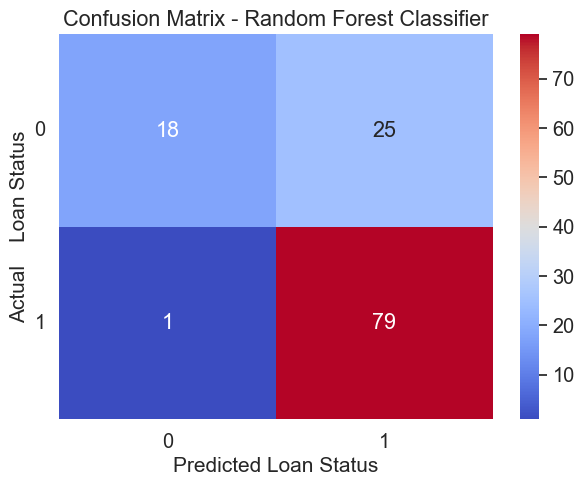

In [30]:
best_model_ = clf_random_forest_tuned.best_estimator_

y_pred = best_model_.predict(X_test)

# Show the F1-score
print('\n' + '\033[1m' + ' F1-Score '.center(60,'-') + '\033[0m' + '\n')

score_performance = f1_score(y_test, y_pred)
print(f'F1-Score of the testing data after hyperparameter tuning = {100 * score_performance:.2f}%')

# Show the classification report
target_names = ['Not Accepted', 'Accepted']
print('\n' + '\033[1m' + ' Classification Report '.center(60,'-') + '\033[0m' + '\n')
print(classification_report(y_test, y_pred, target_names = target_names))

# Show the confusion matrix
print('\n' + '\033[1m' + ' Confusion Matrix '.center(60,'-') + '\033[0m' + '\n')
labels = list(np.unique(y_test))
labels.sort()

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

fig, ax = plt.subplots(figsize = (7, 5))
sns.set(font_scale = 1.3)

sns.heatmap(conf_matrix, annot = True, fmt = 'd', ax = ax, cmap = 'coolwarm')

ax.set_title('Confusion Matrix - Random Forest Classifier')

ax.set_xlabel('Predicted Loan Status', fontsize = 15)
ax.set_ylabel('Actual    Loan Status', fontsize = 15)

ax.set_xticklabels(list(labels))
ax.set_yticklabels(list(labels), rotation = 0)

plt.show()

# **Conclusion**

<p style="text-align: justify; font-family: 'Georgia', cursive, sans-serif; line-height: 1.5;">
The evaluation results showed that the F1-Score value of the model before hyperparameter tuning was 85.25%, while after tuning, the value increased to 85.87%.This increase indicates that the tuning process has a positive impact on the performance of the model, although the increase is relatively small.However, it should be noted that this model has not used resampling techniques to overcome data imbalance and has not applied feature selection to select the most relevant features. Therefore, further development by applying these techniques can be a strategic step to improve the performance of the model in solving this problem.
</p>